In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML


In [4]:

df = pd.read_csv('2024-2025 Flu Season (by Week) - Percent Positive A_B.csv')
df

,Week,Week Starting,% Positive
0,202440,9/30-10/6,0.67
1,202441,10/7-10/13,0.67
2,202442,10/14-20,0.72
3,202443,10/21-10/27,0.96
4,202444,10/28-11/3,1.22
5,202445,11/4-11/10,1.53
6,202446,11/11-11/17,2.11
7,202447,11/18-11/24,2.83
8,202448,11/25-12/1,3.95
9,202449,12/2-12/8,5.19


In [5]:
%%R
 require('tidyverse')


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [9]:
%%R

df <- read_csv('2024-2025 Flu Season (by Week) - Percent Positive A_B.csv')
df

Rows: 18 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Week Starting
dbl (2): Week, % Positive

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 18 × 3
     Week `Week Starting` `% Positive`
    <dbl> <chr>                  <dbl>
 1 202440 9/30-10/6               0.67
 2 202441 10/7-10/13              0.67
 3 202442 10/14-20                0.72
 4 202443 10/21-10/27             0.96
 5 202444 10/28-11/3              1.22
 6 202445 11/4-11/10              1.53
 7 202446 11/11-11/17             2.11
 8 202447 11/18-11/24             2.83
 9 202448 11/25-12/1              3.95
10 202449 12/2-12/8               5.19
11 202450 12/9-12/15              8.6 
12 202451 12/16-12/22            14.2 
13 202452 12/23-12/29            18.3 
14 202501 12/30-1/5              18.2 
15 202502 1/6-1/12               18.4

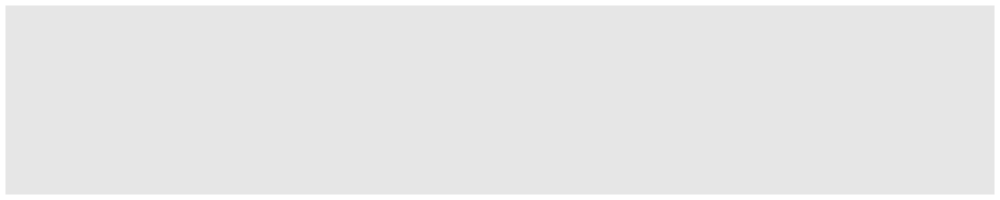

In [10]:
%%R -w 1000 -h 200

ggplot(df) 

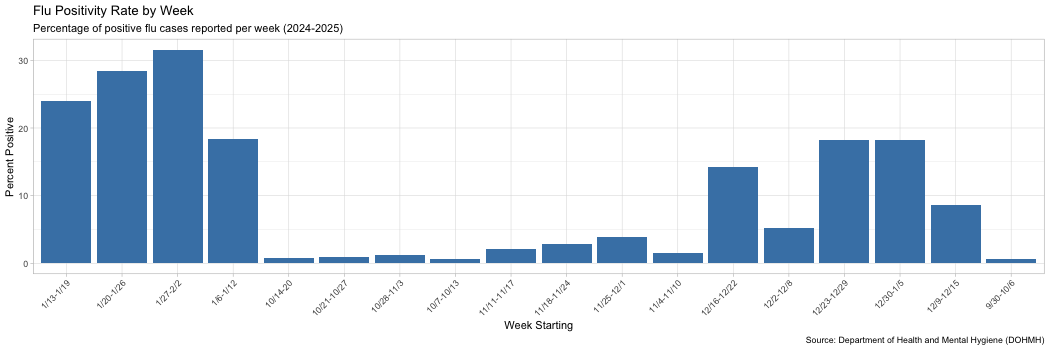

In [41]:
%%R -w 1050 -h 350
ggplot(df) + 
    aes(x='Week Starting', fill = '% Positive') +
    geom_bar(stat = "identity") + 
    #labs(title="Female Population in NYC leading in Flu Deaths ", subtitle="This chart represents the amount of deaths reported in New York City by Influenza. The chart's data consists of 2007 - 2014, which was the last time this data was reported for NYC.", caption="Source: Department of Health and Mental Hygiene (DOHMH) ") +
    #theme_light() +
    #scale_fill_manual(values = c("Male" = "darkcyan", "Female" = "aquamarine3"))

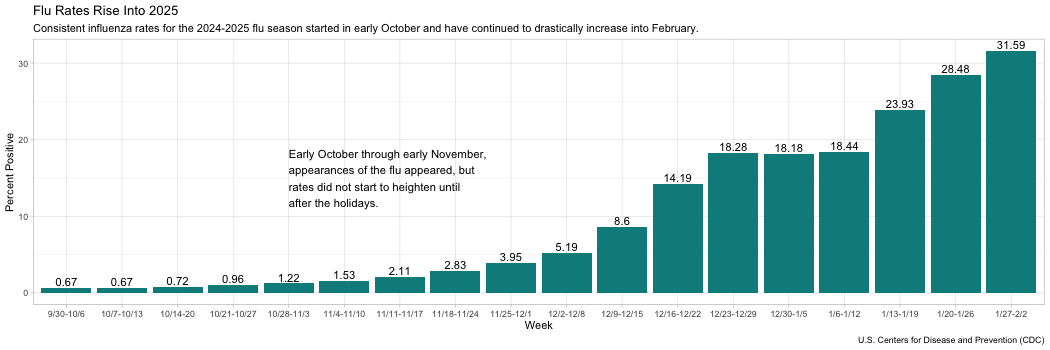

In [80]:
%%R -w 1050 -h 350

df$`Week Starting` <- factor(df$`Week Starting`, levels = unique(df$`Week Starting`))

ggplot(df) +
    aes(x = `Week Starting`, y = `% Positive`) + 
    geom_bar(stat = "identity", fill = "darkcyan", ) + 
    theme_light() +
    labs(
        title = "Flu Rates Rise Into 2025",
        subtitle = "Consistent influenza rates for the 2024-2025 flu season started in early October and have continued to drastically increase into February. ",
        x = "Week",
        y = "Percent Positive",
        caption = "U.S. Centers for Disease and Prevention (CDC)"
        
        ) +
        geom_text(aes(label = `% Positive`), vjust = -0.3, size = 4) +
        annotate("text", x =5 , y =15 , label = "Early October through early November, \nappearances of the flu appeared, but \nrates did not start to heighten until \nafter the holidays. ", color = "black", size = 4, hjust = 0)

In [81]:
%%R
ggsave("flu_deaths_nyc.png", width = 14, height = 5, dpi = 300)